In [1]:
import torch
import numpy as np

# set random seed
seed = 42
torch.manual_seed(seed)

In [2]:
from datasets import list_datasets, load_dataset
all_datasets = list_datasets()
print(f'Available datasets: {len(all_datasets)}')
print(f'The ten first datasets are: {all_datasets[:10]}')

/var/folders/61/66jts0q11blds6prm54dvd1m0000gp/T/ipykernel_38606/2027601445.py:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


Available datasets: 220671
The ten first datasets are: ['google/frames-benchmark', 'openai/MMMLU', 'fka/awesome-chatgpt-prompts', 'k-mktr/improved-flux-prompts-photoreal-portrait', 'argilla/FinePersonas-v0.1', 'migtissera/Synthia-v1.5-I', 'HackerNoon/where-startups-trend', 'k-mktr/improved-flux-prompts', 'SkunkworksAI/reasoning-0.01', 'HuggingFaceFV/finevideo']


In [3]:
emotions = load_dataset('emotion')

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_data = emotions['train']
print(f'Train data: {train_data}')

Train data: Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})


In [6]:
print(train_data.column_names)
print(train_data.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [7]:
print(train_data[0]) # Display the first example in the training set
print(train_data[0].get('text'), ",", train_data[0].get('label')) # Display the text and label of the first example  

{'text': 'i didnt feel humiliated', 'label': 0}
i didnt feel humiliated , 0


In [8]:
train_data[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [9]:
# to get the full column by name
train_data['text'][:5] # Display the first 5 texts 

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

From Datasets to DataFrames

In [10]:
import pandas as pd

emotions.set_format(type='pandas')
df = emotions['train'][:]

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [11]:
print(emotions)

emotions['train'][:5]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [12]:
def label_int_to_str(row):
    # use the int2str method of the label feature to convert the integer label to string
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int_to_str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Class distribution

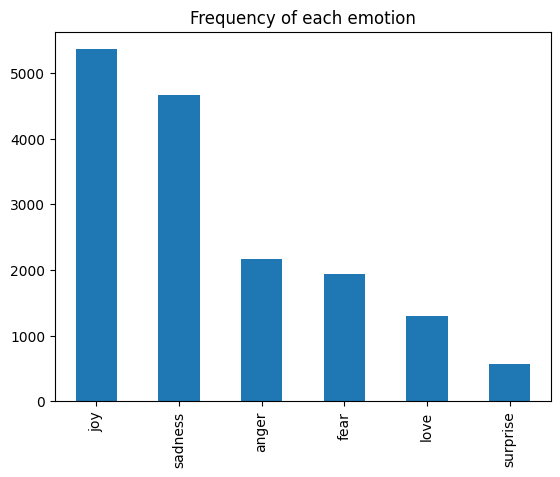

In [13]:
import matplotlib.pyplot as plt

df['label_name'].value_counts().plot(kind='bar')
plt.title("Frequency of each emotion")
plt.show()

In [14]:
df["Word per text"] = df["text"].apply(lambda x: len(x.split()))
df.head()

,text,label,label_name,Word per text
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


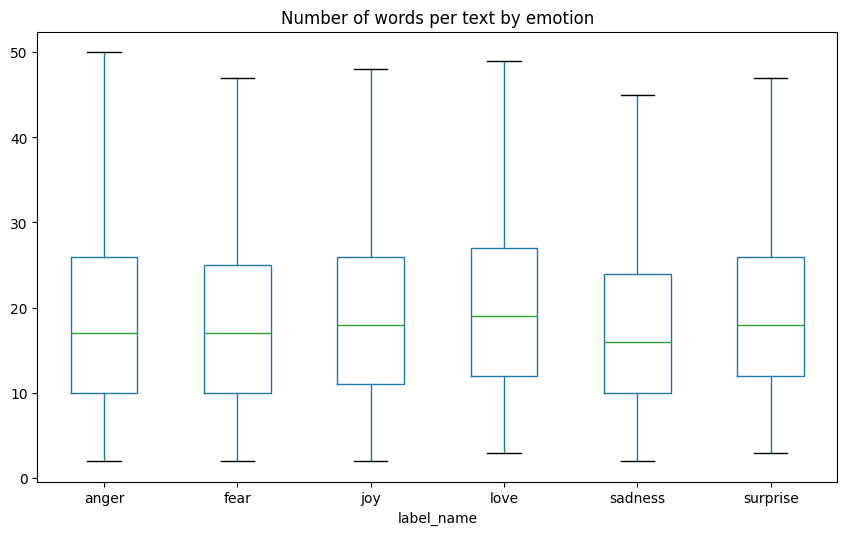

In [15]:
df.boxplot(column="Word per text", by="label_name", showfliers=False, figsize=(10, 6), grid=False)
plt.title("Number of words per text by emotion")
plt.suptitle("")
plt.show()

In [16]:
# reset the format to the default
emotions.reset_format()

print(type(emotions['train']))

<class 'datasets.arrow_dataset.Dataset'>


# Subword Tokenizer

In [17]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/Users/brncat/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [18]:
# optionally I could have loaded the tokenizer as follows

# from transformers import DistilBertTokenizer
# tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [19]:
text = "Tokenizing text is a core task in NLP."

In [20]:
encoded_input = tokenizer(text)
print(encoded_input)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
type(encoded_input)

transformers.tokenization_utils_base.BatchEncoding

In [22]:
tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'])
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'in', 'nl', '##p', '.', '[SEP]']


In [23]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task in nlp. [SEP]


In [24]:
print(f"tokenizer vocabulary size: {tokenizer.vocab_size}")
print(f"tokenizer model max length: {tokenizer.model_max_length}")

tokenizer vocabulary size: 30522
tokenizer model max length: 512


## Tokenizing a Dataset

In [25]:
print(emotions['train'][0])
print(emotions['train'].column_names)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']


In [26]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

In [27]:
print(tokenize(train_data[:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [28]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [29]:
print(emotions_encoded['train'][0])
print(emotions_encoded['train'].column_names)

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
['text', 'label', 'input_ids', 'attention_mask']


# Using Transformers as feature extractors

In [30]:
from transformers import AutoModel 

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Extracting the last hidden state

In [31]:
text = "this is a test"

encoded_input = tokenizer(text, return_tensors='pt')
encoded_input.to(device)

print(encoded_input)
print(f"input shape: {encoded_input['input_ids'].shape}")

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
input shape: torch.Size([1, 6])


as we can see, the output has shape `[batch_size, n_tokens]`

In [32]:
print(encoded_input)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [33]:
# place the encoded input to the same device
inputs = {k: v.to(device) for k, v in encoded_input.items()}

with torch.no_grad():
    outputs = model(**inputs)

print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1620]]]), hidden_states=None, attentions=None)


In [34]:
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [35]:
outputs["last_hidden_state"].shape

torch.Size([1, 6, 768])

In [36]:
outputs.last_hidden_state.shape

torch.Size([1, 6, 768])

we see that it has the shape `[batch_size, n_tokens, hidden_dim]`

In classification tasks, it is common practice to use only the first hidden state associated with the CLS token.

In [37]:
# the hidden state of the first token

print(outputs.last_hidden_state[:,0].shape)

torch.Size([1, 768])


In [38]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

Now we can get the last hidden state for the whole dataset

In [39]:
def extract_hidden_state(batch):
    # place model inputs on GPU
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    # extract the hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # return vector for CLS token
    return {'last_hidden_state': last_hidden_state[:,0].cpu().numpy()}

In [40]:
# convert the input_ids and attention_mask columns to torch tensors
emotions_encoded.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

In [41]:
emotions_hidden = emotions_encoded.map(extract_hidden_state, batched=True)

In [42]:
print(emotions_hidden['train'][0])

{'label': tensor(0), 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0,

In [43]:
print(emotions_hidden['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask', 'last_hidden_state']


In [44]:
emotions_hidden['train']['text'][0]

'i didnt feel humiliated'

In [45]:
emotions_hidden['train']['input_ids'][0]

tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])

## Creating a feature matrix

In [46]:
import numpy as np

X_train = np.array(emotions_hidden['train']['last_hidden_state'])
X_valid = np.array(emotions_hidden['validation']['last_hidden_state'])

y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

print(X_train.shape, X_valid.shape)

(16000, 768) (2000, 768)


### Training a simple classifier (Logistic Regression)

In [47]:
# Let's train a simple logistic regression model on the extracted features

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

clf.score(X_valid, y_valid)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/brncat/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6345

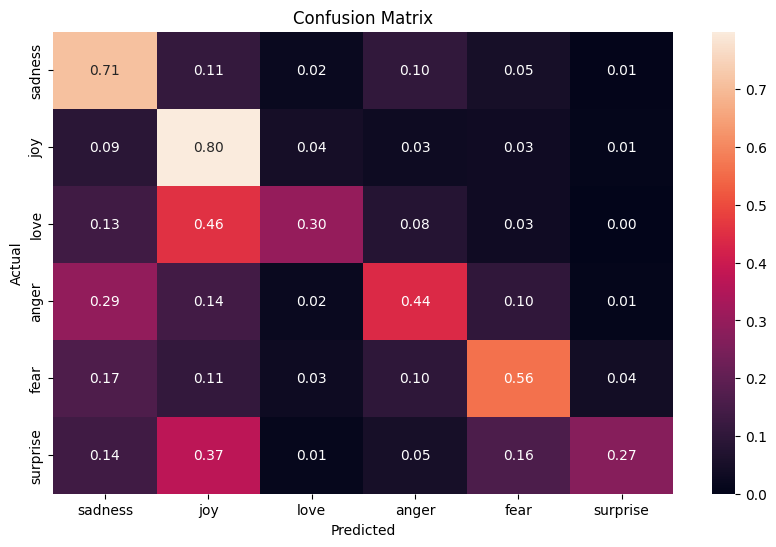

In [48]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred, normalize='true')

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=emotions['train'].features['label'].names, yticklabels=emotions['train'].features['label'].names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Fine-Tuning Transformers

Restart the notebook at this point to continue